# 4.10 Instacart Final Analysis

### Table of Contents

01. Import

02. Creating Flags

03. Creating subsets

04. Creating charts

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing customers_orders_products.pkl dataframe
path = r'C:\Users\31622\OneDrive\Documents\Career Foundry\Career Foundry\Exercise\Exercise 4\Instacart Basket Analysis'
instacart_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_clean.pkl'))

**Question 3: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Export this sample.**

In [3]:
# check column of data frame
instacart_clean.columns

Index(['order_id', 'user_id', 'number_of_orders', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'Spending_flag', 'median_days', 'frequency_flag',
       'Gender', 'STATE', 'Age', 'date_joined', 'Num_of_dependants',
       'Marital_status', 'income', 'Region'],
      dtype='object')

#### 02. Create Flags

In [4]:
# create flag based on max_order related to customer activity
instacart_clean.loc[instacart_clean['max_order'] >= 5, 'customer_activity'] = 'High_active_customer'

In [5]:
instacart_clean.loc[instacart_clean['max_order'] < 5, 'customer_activity'] = 'Low_active_customer'

#### 03. Create Subset

In [6]:
# create subset for low activity customer
df_low_activity = instacart_clean[instacart_clean['customer_activity'] == 'Low_active_customer']

In [7]:
df_high_activity = instacart_clean[instacart_clean['customer_activity'] == 'High_active_customer']

In [8]:
#checking shape of subsets
df_high_activity.shape

(30992664, 33)

In [9]:
df_low_activity.shape

(1441548, 33)

In [10]:
#export high activity df
df_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_active_cust.pkl'))

**Question 5: Customer Profiling**

In [11]:
# Importing high activity data
instacart_high = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_active_cust.pkl'))

In [12]:
instacart_high.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,Gender,STATE,Age,date_joined,Num_of_dependants,Marital_status,income,Region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer


Age

In [13]:
# Checking Maxamimum Age
instacart_high['Age'].max()

81

In [14]:
# checking Minimum Age
instacart_high['Age'].min()

18

In [15]:
# create new flags for age groups
instacart_high.loc[instacart_high['Age'] >=60, 'age_group'] = 'Older_Age'
instacart_high.loc[(instacart_high['Age'] >35) & (instacart_high['Age'] <60), 'age_group'] = 'Middle_Age'
instacart_high.loc[instacart_high['Age'] <=35, 'age_group'] = 'Young_Age'

In [16]:
instacart_high['age_group'].value_counts(dropna=False)

Middle_Age    11661944
Older_Age     10583941
Young_Age      8746779
Name: age_group, dtype: int64

In [17]:
# checking column
instacart_high.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,STATE,Age,date_joined,Num_of_dependants,Marital_status,income,Region,customer_activity,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer,Young_Age
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer,Young_Age
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer,Young_Age
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer,Young_Age
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,High_active_customer,Young_Age


Income

**Income grouping created based on Pew's Research centre income grouping - Low income: 38200, Middle income: 38200 - 114400, High income: above 114400**

In [18]:
# Create an income flag for the three categories
instacart_high.loc[(instacart_high['income'] < 38200 ), 'income_group'] = 'low_income'
instacart_high.loc[(instacart_high['income'] >= 38200 ) & (instacart_high['income'] < 114400), 'income_group'] = 'middle_income'
instacart_high.loc[(instacart_high['income'] >= 114400 ), 'income_group'] = 'high_income'

In [19]:
instacart_high['income_group'].value_counts(dropna=False)

middle_income    19130626
high_income      10514934
low_income        1347104
Name: income_group, dtype: int64

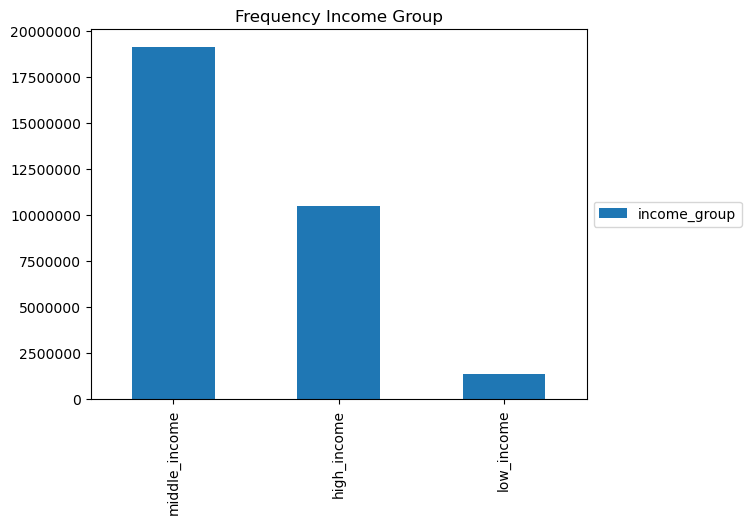

In [20]:
# create a bar chart chart for income group
bar_income_grp = instacart_high['income_group'].value_counts().plot.bar()
plt.title('Frequency Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [21]:
#export bar chart for income group
bar_income_grp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

Dependents

In [22]:
# Checking Maxamimum Dependants
instacart_high['Num_of_dependants'].max()

3

In [23]:
# Checking Minimum Dependants
instacart_high['Num_of_dependants'].min()

0

In [24]:
# Create flag for the no. of dependants 
instacart_high.loc[instacart_high['Num_of_dependants'] == 0, 'dependant_group'] = 'No_Dependants'
instacart_high.loc[instacart_high['Num_of_dependants'] >0, 'dependant_group'] = 'Dependants'

In [25]:
# Exporting instacart_high customer data
instacart_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_high.pkl'))